In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Differentiation
In this exercise, we explore what happens when discretizing the operator $K$. We'll see that discretization implicitly regularizes the problem and that refining the discretization brings out the inherent ill-posedness.

Discretize $x_k = k\cdot h$ with $k = 1, \ldots, n$ and $h = 1/(n+1)$.

$$Ku(x_i)=\int_0^{x_i} u(y)\mathrm{d}y \approx h\sum_{j=0}^n k_{ij} u(x_j),$$
with $k_{ij} = k(x_i,x_j) = H(x_i - x_j)$, giving an $n\times n$ lower triangular matrix
$$K = h\cdot\left(\begin{matrix} 1 & 0 & 0 \\ 1 & 1 & 0 \\ 1 & 1 & 1 & \ldots \\ \vdots & & &\ddots \end{matrix}\right)$$

In [7]:
def getK(n):
    h = 1/(n+1)
    x = np.linspace(h,1-h,n)
    K = h*np.tril(np.ones((n,n)))
        
    return K,x

1. Compute the SVD for various $n$ and compare the singular values and vectors to the ones of the continuous operator. What do you notice?

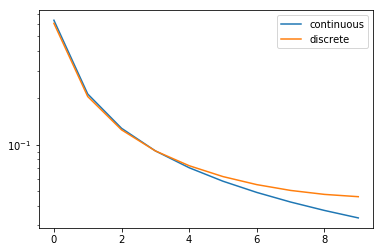

In [8]:
n = 10
K,x = getK(n)

U,s,Vh = np.linalg.svd(K)

k = np.arange(n)
plt.semilogy(1/(k + 0.5)/np.pi,label='continuous')
plt.semilogy(s,label='discrete')
plt.legend()

2. Take `f = x^3 + delta*np.random.randn(n)` and investigate the accuracy of the reconstruction (use `np.linalg.solve` to solve $Ku = f$). Note that the exact solution is given by $u = x^2$. Do you see the regularizing effect of $n$?

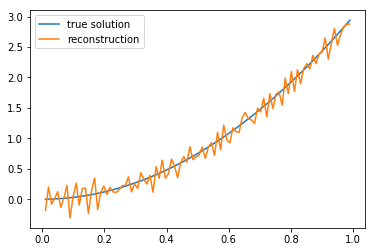

In [9]:
n = 100
delta = 1e-3

K,x = getK(n)
u = 3*x**2
f = x**3 + delta*np.random.randn(n)
ur = np.linalg.solve(K,f)

plt.plot(x,u,label='true solution')
plt.plot(x,ur,label='reconstruction')
plt.legend()